In [2]:
import statsmodels.api as sm
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

DATA_DIR = (os.getcwd() + "/data/")
start_date = '1999-01-01'
end_date = "2019-12-31"
# Get fundamental data for each stock in the ticker and append to the dataframe


def get_all_symbols():
    return [v.strip('.csv') for v in os.listdir(DATA_DIR)]


tickers = get_all_symbols()


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

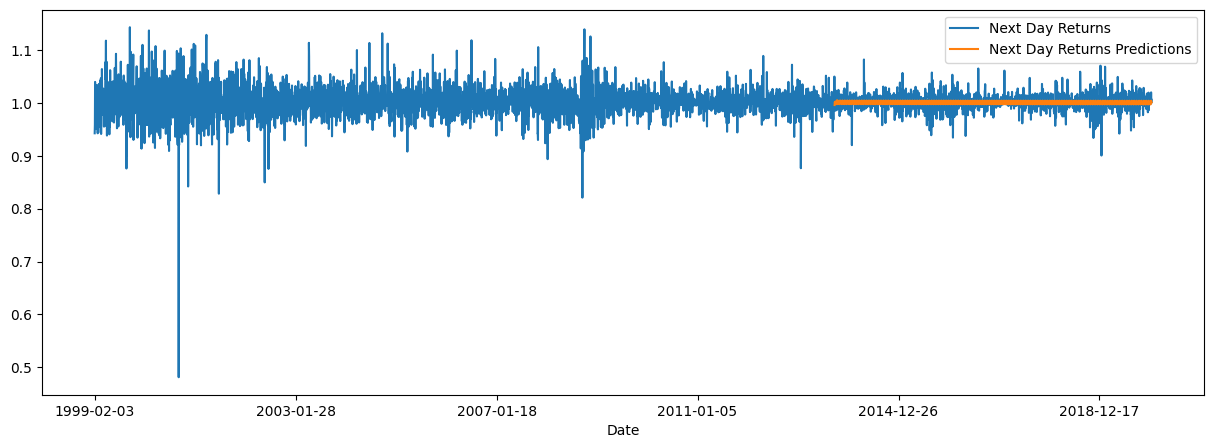

In [6]:
tickers = ['AAPL']
for ticker in tickers:
    ticker_data = pd.read_csv(f"data/{ticker}.csv", index_col=0)
    ticker_data['Next Day Returns'] = ticker_data['Returns'].shift(-1)
    ticker_data.dropna(inplace=True)
    
    
    train, test = train_test_split(ticker_data, test_size=0.3, shuffle=False)
    #print(ticker_data.head())
    features = ticker_data[['Short Term Reversal', 'Adj Close', 'Volume', 'Long Term Reversal', 'Stock Momentum', 'Market_Beta', 'Turnover Volatility']]
    target = ticker_data['Next Day Returns']
    
    model = sm.tsa.statespace.SARIMAX(train['Next Day Returns'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    
    forecast = results.get_forecast(steps=len(test))
    y_pred = forecast.predicted_mean
    
    #y_pred = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True, params=results.params)
    
    ticker_data['Next Day Returns Predictions'] = np.nan
    ticker_data.iloc[-len(y_pred):, ticker_data.columns.get_loc(
        'Next Day Returns Predictions')] = y_pred
    ticker_data[['Next Day Returns', 'Next Day Returns Predictions']].plot(
        figsize=(15, 5))
    
    
    
    
    
    